# MSDS 400 Solving LP Models Graphically

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

**To solve LP problems graphically, we perform the following tasks.**
1. Graph the feasible region 
2. Find all the corner points of the region
3. Evaluate the objective function at each of the corner points
4. Find the extreme value of the objective function

* We use the following example to demonstrate the four steps.

**Maximize `z = 3x + 4y` subject to**

```python
2x + y ≤ 4
-x + 2y ≤ 4
x ≤ 1.5
x ≥ 0
y ≥ 0 
```

**1. Graph the feasible region.**
* Note that each inequality determines a region whose boundary is the line of the corresponding equation. 
* For example, the boundary of the region satisfying `2x + y ≤ 4` is the line of the graph of `2x + y = 4`. 
* Also note that the graph of `x = 1.5` is a vertical line passing through the x-axis at 1.5, `x = 0` and `y = 0` are the x & y-axes.
* The Python code below graphs the three lines (not including the x & y-axes) and shades the feasible region.

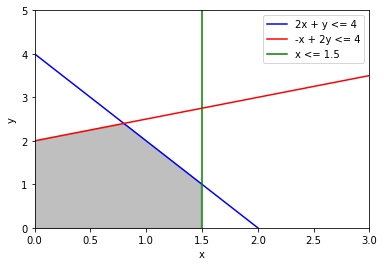

In [2]:
# Graph the three boundaries (lines) (not including the x & y-axes)
x = np.linspace(0, 3, 100)  # choose 100 x-values between 0 and 3 to plot each boundary

y1 = 4 - 2*x     # solve 2x + y = 4 for y and save it as y1
plt.plot(x, y1, color='b', label='2x + y <= 4') # plot of the boundary of constrain 1

y2 = 2 + 0.5*x  # solve -x + 2y = 4 for y and save it as y2
plt.plot(x, y2, color='r', label='-x + 2y <= 4') # plot of the boundary of constrain 2

# polt the vertical line x =1.5
plt.axvline(1.5, color='g', label='x <= 1.5') # plot of the boundary of constrain 3

plt.xlim((0, 3))
plt.ylim((0, 5))
plt.xlabel('x')
plt.ylabel('y')

# Fill the feasible region
plt.fill_between(x, np.minimum(y1, y2), where=x<=1.5, color='grey', alpha=0.5)
plt.legend(bbox_to_anchor=(1, 1), loc=1)
plt.show()

**2. Find the corner points of the feasible region.**
* Note that there are 4 corner points (not including the origin): two of the 4 corner points are the x & y intercepts which we can see clearly from the plot. All we need is to find the other two corner points by solving systems of equations.
* The corner point formed by the blue and red lines are the point of intersection of `2x + y = 4` and `-x + 2y = 4`; the corner point formed by the blue and green lines are the point of intersection of `2x + y = 4` and `x = 1.5`.
* The Python code below finds the two corner points by solving the systems of equations.

In [3]:
# Solve the system of equations to find the corner point formed by the blue and red lines
# 2x + y = 4
# -x + 2y = 4
A1 = np.array([[2,1], [-1,2]])
b1 = np.array([4,4])
c1 = np.linalg.solve(A1, b1)
print('Corner point 1: ', c1)

# Find the second corner point formed by the blue and green lines 
# 2x + y = 4
# x + 0y = 1.5
A2 = np.array([[2,1], [1,0]])
b2 = np.array([4,1.5])
c2 = np.linalg.solve(A2, b2)
print('Corner point 2: ', c2)

Corner point 1:  [0.8 2.4]
Corner point 2:  [1.5 1. ]


**3. Evaluate the objective function at each of the 4 corner points.**
* Corner point 1: `(0.8, 2.4)` the intersection of the blue and red lines
* Corner point 2: `(1.5, 1.0)` the intersection of the blue and green lines
* Corner point 3: `(1.5, 0)` the x-intercept of the line `x = 1.5`
* Corner point 4: `(0, 2)` the y-intercept of the line `2x + y = 4`

In [4]:
# Define the objective function:
def objfunc(x, y):
    return 3*x + 4*y  
       
# Evaluate the function at each corner point:
print(f'The function value at (0.8, 2.4) is {objfunc(0.8, 2.4)}')
print(f'The function value at  (1.5, 1.0) is {objfunc(1.5, 1.0)}')
print(f'The function value at (1.5, 0) is {objfunc(1.5, 0)}')
print(f'The function value at (0, 2) is {objfunc(0, 2)}')

The function value at (0.8, 2.4) is 12.0
The function value at  (1.5, 1.0) is 8.5
The function value at (1.5, 0) is 4.5
The function value at (0, 2) is 8


**4. Identify the maximum value.**
* Clearly the maximum value is 12.0 when x = 0.8 and y = 2.4